In [1]:
from astropy.io import fits
from astropy.table import Table, Column, hstack
from astropy.modeling import models, fitting
import pdb
import numpy as np
import rafias_lib as rl
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### Importing All Files (Full1 - Full5)

In [2]:
num = ['1', '2', '3', '4', '5']
dtype = ['481', '489']

In [3]:
#Importing a1 files
a1_files = []
for n in num:
    hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'+
                              'NRCN821WLP8FULL'+n+'-*_1_'+dtype[0]+'_SE_*/*.red.fits')
    a1_files.append(hdu_filenames_a1)
print len(a1_files), len(a1_files[0]), len(a1_files[1]), len(a1_files[2]), len(a1_files[3]), len(a1_files[4])

5 225 225 225 225 110


In [4]:
#Importing b4 files
b4_files = []
for n in num:
    hdu_filenames_b4 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'+
                              'NRCN821WLP8FULL'+n+'-*_1_'+dtype[1]+'_SE_*/*.red.fits')
    b4_files.append(hdu_filenames_b4)
print len(b4_files), len(b4_files[0]), len(b4_files[1]), len(b4_files[2]), len(b4_files[3]), len(b4_files[4])

5 225 225 225 225 110


### Generating Centers By Doing A Gaussian Fit

In [ ]:
a1_centers = []
for ds in a1_files:
    a1_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True)[0])
print len(a1_centers), len(a1_centers[0])
a1_centers

In [5]:
a1_center = rl.gen_center_g2d(1405,1036,5,400,4,4,0,a1_files[0], red = True)[0]

In [6]:
b4_centers = []
for ds in b4_files:
    b4_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red_files = True))
print len(b4_centers), len(b4_centers[0])
b4_centers

5 225


[[(Parameter('x_mean', value=828.199230464),
   Parameter('y_mean', value=821.105877298)),
  (Parameter('x_mean', value=828.182170489),
   Parameter('y_mean', value=821.098735778)),
  (Parameter('x_mean', value=828.098623576),
   Parameter('y_mean', value=821.123073338)),
  (Parameter('x_mean', value=828.135584349),
   Parameter('y_mean', value=821.120581908)),
  (Parameter('x_mean', value=828.125137578),
   Parameter('y_mean', value=821.133328026)),
  (Parameter('x_mean', value=828.103466492),
   Parameter('y_mean', value=821.116739172)),
  (Parameter('x_mean', value=828.121514203),
   Parameter('y_mean', value=821.064932086)),
  (Parameter('x_mean', value=828.092914072),
   Parameter('y_mean', value=821.059064416)),
  (Parameter('x_mean', value=828.114599184),
   Parameter('y_mean', value=821.08456292)),
  (Parameter('x_mean', value=828.234791825),
   Parameter('y_mean', value=821.10693755)),
  (Parameter('x_mean', value=828.189197049),
   Parameter('y_mean', value=821.110023761)),
 

### Radius Testing

In [7]:
full_array_rad_test = rl.radius_testing(a1_center, 30, 130, 10, 50, 150, 10, 70, 170, 10, a1_files[0], red = True)
full_array_rad_test.write('full_array_rad_test.csv')

The minimum Standard deviation is 0.002442
It occurs for the radius r = 50.000000
It occurs for the inner radius r_in = 60.000000
It occurs for the outer radius r_out = 70.000000


### Calculating Average Residual Flux

In [7]:
# Generating data for slope1
for index,(a1c,b4c,a1,b4) in enumerate(zip(a1_centers, b4_centers, a1_files, b4_files)):
    globals()['data%s' % (index+1)] = rl.average_residual_flux(a1c, b4c, 60, 80, 90, a1, b4, red_files = True)

In [8]:
data_sets = []
for x in range(0,5):
    data_sets.append(globals()['data%s' % (x+1)])
print len(data_sets), len(data_sets[0]), len(data_sets[4])
data_sets

5 225 110


[<Table length=225>
 a1_b4_raw_flux a1_b4_bkg_flux  a1_res_flux  ... a1_b4_res_flux    Time   
    float64        float64        float64    ...    float64      float64  
 -------------- -------------- ------------- ... -------------- ----------
  3594672.89602  13863.8465734 3136320.27196 ...   3565314.1621        0.0
  3594610.84309  14292.8657155 3141377.42023 ...  3564343.59805   32.21028
  3600469.09146  16114.0286117 3154926.08608 ...  3566345.26616   64.42056
  3600118.39599  16400.6229311 3154878.70846 ...  3565387.66507   96.63084
  3596309.03441   15792.780697 3151995.85168 ...  3562865.49882  128.84112
  3586430.57282  13548.8601362 3152280.13866 ...  3557738.86901   161.0514
  3580715.85406  13352.7101037  3146776.8752 ...  3552439.52678  193.26168
  3589987.57741  16896.7248475 3139486.40526 ...  3554206.27774  225.47196
  3584893.14596  13510.5406747 3151899.36804 ...  3556282.58924  257.68224
  3595627.25916  17684.8554251 3156877.31256 ...  3558176.97708  289.89252
     

In [40]:
def get_stdev(data):
    norm_res_flux = data['a1_b4_res_flux'][2:]/np.median(data['a1_b4_res_flux'][2:])
    return np.std(norm_res_flux)

In [41]:
stdev_comparison = Table(names = ('Index','Stdev'))
for index, data in enumerate(data_sets):
    stdev = get_stdev(data)
    stdev_comparison.add_row([num[index],stdev])
stdev_comparison

Index,Stdev
float64,float64
1.0,0.00152789456205
2.0,0.00172598651414
3.0,0.00195053013663
4.0,0.00137017482017
5.0,0.00128734738641


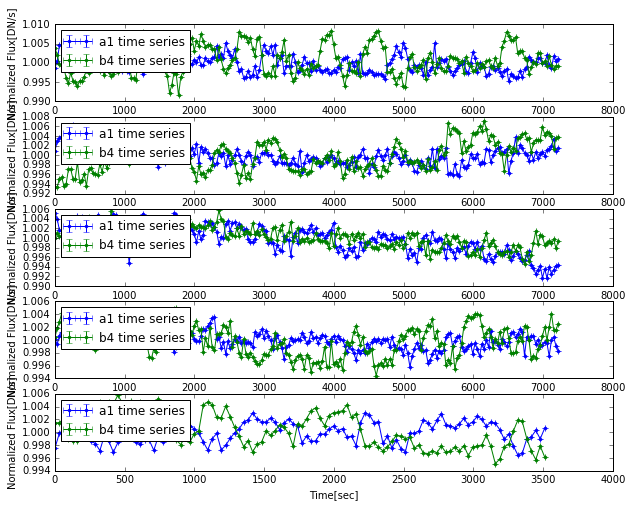

In [11]:
for index, data in enumerate(data_sets):
    plt.subplot(5, 1, index+1)
    rl.light_curve(data['Time'], data['a1_res_flux'], 0, 0, '.-', lbl = 'a1 time series')
    rl.light_curve(data['Time'], data['b4_res_flux'], 0, 0, '.-', lbl = 'b4 time series')
    plt.legend(loc='upper left')

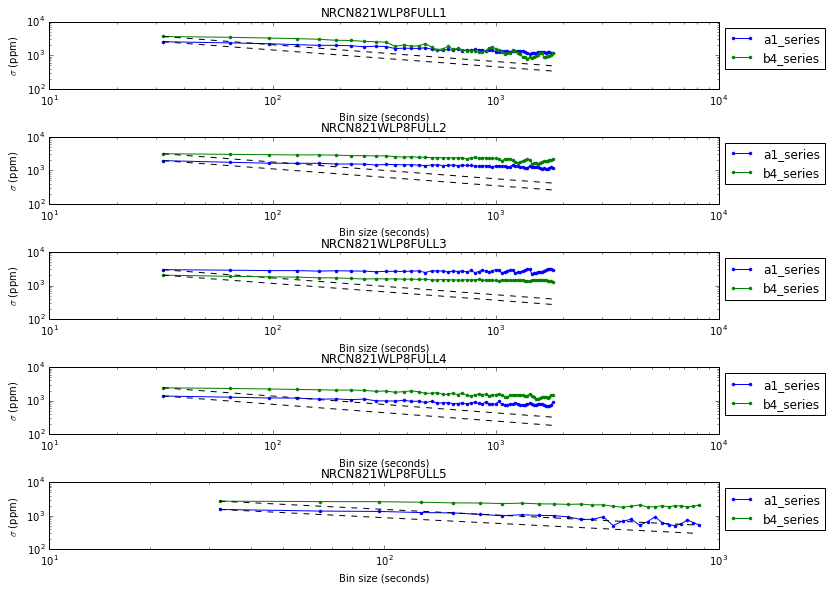

In [60]:
for index, data in enumerate(data_sets):
    if index != 4:
        plt.subplot(5, 1, index+1)
        rl.rms_vs_bin(data['Time'], data['a1_res_flux'], 1, 57, 1, 225, '.-', 'a1_series')
        rl.rms_vs_bin(data['Time'], data['b4_res_flux'], 1, 57, 1, 225, '.-', 'b4_series')
        plt.title('NRCN821WLP8FULL%s' % (index+1))
        plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
    else:
        plt.subplot(5, 1, index+1)
        rl.rms_vs_bin(data['Time'], data['a1_res_flux'], 1, 28, 1, 110, '.-', 'a1_series')
        rl.rms_vs_bin(data['Time'], data['b4_res_flux'], 1, 28, 1, 110, '.-', 'b4_series')
        plt.title('NRCN821WLP8FULL%s' % (index+1))
        plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
        plt.tight_layout(pad = 0.01)

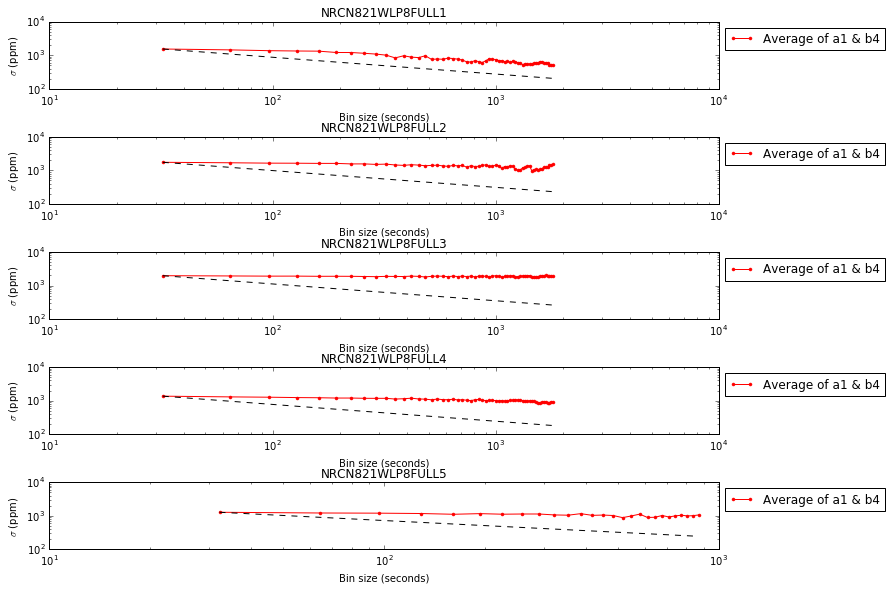

In [61]:
for index, data in enumerate(data_sets):
    if index != 4:
        plt.subplot(5, 1, index+1)
        rl.rms_vs_bin(data['Time'], data['a1_b4_res_flux'], 1, 57, 1, 225, 'r.-', 'Average of a1 & b4')
        plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
        plt.title('NRCN821WLP8FULL%s' % (index+1))
    else:
        plt.subplot(5, 1, index+1)
        rl.rms_vs_bin(data['Time'], data['a1_b4_res_flux'], 1, 28, 1, 110, 'r.-', 'Average of a1 & b4')
        plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
        plt.title('NRCN821WLP8FULL%s' % (index+1))
        plt.tight_layout(pad = 0.01)

## Best data from (1 - 5)
##### Using only the image plane 2

In [13]:
centers_5a1 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,a1_files[4], red_files = True, rf_slope = True)
centers_5a1

[(Parameter('x_mean', value=1405.02123644),
  Parameter('y_mean', value=1037.79528079)),
 (Parameter('x_mean', value=1405.12698688),
  Parameter('y_mean', value=1037.82591034)),
 (Parameter('x_mean', value=1405.07357667),
  Parameter('y_mean', value=1037.83678593)),
 (Parameter('x_mean', value=1405.09988486),
  Parameter('y_mean', value=1037.85706581)),
 (Parameter('x_mean', value=1405.13978244),
  Parameter('y_mean', value=1037.8370634)),
 (Parameter('x_mean', value=1405.10710575),
  Parameter('y_mean', value=1037.86912045)),
 (Parameter('x_mean', value=1405.10393093),
  Parameter('y_mean', value=1037.88808566)),
 (Parameter('x_mean', value=1405.04148143),
  Parameter('y_mean', value=1037.87988345)),
 (Parameter('x_mean', value=1405.04684354),
  Parameter('y_mean', value=1037.86707624)),
 (Parameter('x_mean', value=1405.05645375),
  Parameter('y_mean', value=1037.8670492)),
 (Parameter('x_mean', value=1405.02181668),
  Parameter('y_mean', value=1037.8623938)),
 (Parameter('x_mean', va

In [14]:
centers_5b4 = rl.gen_center_g2d(828,821,5,600,4,4,0,b4_files[4], red_files = True, rf_slope = True)
centers_5b4

[(Parameter('x_mean', value=828.143864113),
  Parameter('y_mean', value=821.425575547)),
 (Parameter('x_mean', value=828.212676464),
  Parameter('y_mean', value=821.454743154)),
 (Parameter('x_mean', value=828.176415657),
  Parameter('y_mean', value=821.464160088)),
 (Parameter('x_mean', value=828.201561919),
  Parameter('y_mean', value=821.476303091)),
 (Parameter('x_mean', value=828.200842623),
  Parameter('y_mean', value=821.440373129)),
 (Parameter('x_mean', value=828.186153172),
  Parameter('y_mean', value=821.49253253)),
 (Parameter('x_mean', value=828.184602358),
  Parameter('y_mean', value=821.49605933)),
 (Parameter('x_mean', value=828.13370722),
  Parameter('y_mean', value=821.490340687)),
 (Parameter('x_mean', value=828.135783168),
  Parameter('y_mean', value=821.466713986)),
 (Parameter('x_mean', value=828.149975107),
  Parameter('y_mean', value=821.482447181)),
 (Parameter('x_mean', value=828.10338392),
  Parameter('y_mean', value=821.468310766)),
 (Parameter('x_mean', val

In [15]:
data_best = rl.average_residual_flux(centers_5a1,centers_5b4, 60, 80, 90, a1_files[4], b4_files[4],
                                     red_files = True, rf_slope = True)

In [16]:
np.std(data_best['a1_b4_res_flux']/np.median(data_best['a1_b4_res_flux']))

0.0015276542334573037

In [17]:
#plane1 - plane2 ds5
data = rl.average_residual_flux(a1_centers[4],b4_centers[4], 60, 80, 90, a1_files[4], b4_files[4], red_files = True)

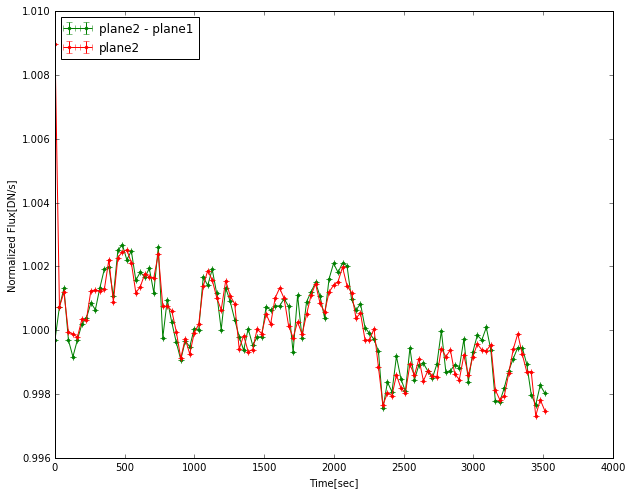

In [18]:
rl.light_curve(data['Time'], data['a1_b4_res_flux'], 0, 0, 'g.-', lbl = 'plane2 - plane1')
rl.light_curve(data_best['Time'], data_best['a1_b4_res_flux'], 0, 0, 'r.-', lbl = 'plane2')
plt.legend(loc='upper left')

## Comparison Between Slopes

In [19]:
# Generating data for slope2
for index,(a1c,b4c,a1,b4) in enumerate(zip(a1_centers, b4_centers, a1_files, b4_files)):
    globals()['s2_data%s' % (index+1)] = rl.average_residual_flux(a1c, b4c, 60, 80, 90, a1, b4, 
                                                               red_files = True, rf_slope = True)

In [26]:
s2_data_sets = []
for x in range(0,5):
    s2_data_sets.append(globals()['s2_data%s' % (x+1)])
print len(s2_data_sets), len(s2_data_sets[0]), len(s2_data_sets[4])
s2_data_sets

5 225 110


[<Table length=225>
 a1_b4_raw_flux a1_b4_bkg_flux  a1_res_flux  ... a1_b4_res_flux    Time   
    float64        float64        float64    ...    float64      float64  
 -------------- -------------- ------------- ... -------------- ----------
   3551478.6313  16290.3969431 3083723.45112 ...  3516981.32013        0.0
  3516954.16271  16431.5729837 3055988.43532 ...  3482157.89051   32.21028
  3516451.19706  14397.5028919  3072992.5627 ...  3485962.36741   64.42056
  3523614.12988  19340.4121884 3070215.75905 ...  3482657.96289   96.63084
  3508561.07905  13953.1530734 3066387.14275 ...  3479013.22548  128.84112
  3507456.94797   15343.894711 3066438.54302 ...  3474963.99446   161.0514
  3504045.55235  15344.1973283 3064049.17582 ...  3471551.95801  193.26168
  3503502.41757  14793.7138401  3059563.0754 ...  3472174.55297  225.47196
   3508497.0881  16189.3403066 3067506.25033 ...  3474213.77922  257.68224
  3509142.88983  15374.4437008 3073613.09651 ...  3476585.24435  289.89252
     

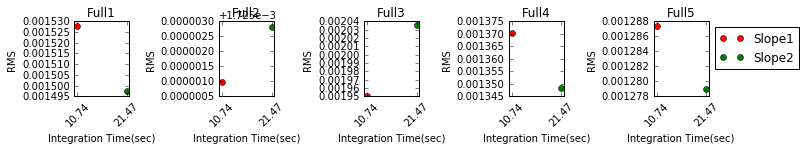

In [118]:
#rms vs. nreads
plt.figure(figsize=(10,2))
for index, (s1, s2) in enumerate(zip(data_sets, s2_data_sets)):
    s1_std = np.std(s1['a1_b4_res_flux'][2:]/np.median(s1['a1_b4_res_flux'][2:]))
    s2_std = np.std(s2['a1_b4_res_flux'][2:]/np.median(s2['a1_b4_res_flux'][2:]))
    hdu = fits.open(a1_files[index][1])
    header = hdu[0].header
    s1_time = (header['NGROUP']-1)*header['TGROUP']
    s2_time = header['NGROUP']*header['TGROUP']
    x = [s1_time, s2_time]
    y = [s1_std, s2_std]
    plt.subplot(1, 5, index+1)
    plt.plot(x[0],y[0],'ro', label = 'Slope1')
    plt.plot(x[1],y[1],'go', label = 'Slope2')
    plt.title('Full%s' % (index+1))
    plt.xticks(x, rotation = 45)
    plt.xlabel('Integration Time(sec)')
    plt.ylabel('RMS')
    hdu.close()
plt.legend(loc='upper left', bbox_to_anchor = (1,1))
plt.tight_layout(pad = 0.5, w_pad = 0.8, h_pad = 0.5)

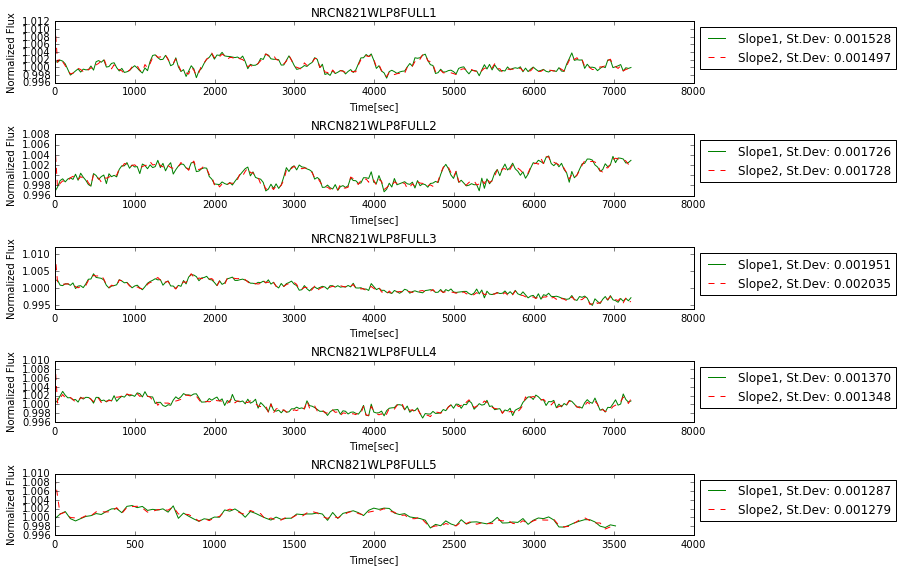

In [39]:
for index, (s1, s2) in enumerate(zip(data_sets, s2_data_sets)):
    s1_std = np.std(s1['a1_b4_res_flux'][2:]/np.median(s1['a1_b4_res_flux'][2:]))
    s2_std = np.std(s2['a1_b4_res_flux'][2:]/np.median(s2['a1_b4_res_flux'][2:]))
    plt.subplot(5, 1, index+1)
    rl.light_curve(s1['Time'], s1['a1_b4_res_flux'], None, None, 'g-', lbl = 'Slope1, St.Dev: %f' % s1_std)
    rl.light_curve(s2['Time'], s2['a1_b4_res_flux'], None, None, 'r--', lbl = 'Slope2, St.Dev: %f' % s2_std)
    plt.ylabel('Normalized Flux')
    plt.title('NRCN821WLP8FULL%s' % (index+1))
    plt.tight_layout()
    plt.legend(loc='upper left', bbox_to_anchor = (1,1))

In [42]:
stdev_comparison2 = Table(names = ('Index','Stdev'))
for index, data in enumerate(s2_data_sets):
    stdev2 = get_stdev(data)
    stdev_comparison2.add_row([num[index],stdev2])
stdev_comparison2

Index,Stdev
float64,float64
1.0,0.0014973189019
2.0,0.00172779872515
3.0,0.00203543489711
4.0,0.00134819911662
5.0,0.00127899054018


In [43]:
# slope1 = (Plane2 - Plane1)/Tgroup
# slope2 = Plane2/Tgroup
slope_comparison = Table()
slope_comparison['Index'] = [1,2,3,4,5]
slope_comparison['Slope1'] = stdev_comparison['Stdev']
slope_comparison['Slope2'] = stdev_comparison2['Stdev']
slope_comparison

Index,Slope1,Slope2
int64,float64,float64
1,0.00152789456205,0.0014973189019
2,0.00172598651414,0.00172779872515
3,0.00195053013663,0.00203543489711
4,0.00137017482017,0.00134819911662
5,0.00128734738641,0.00127899054018


## Calculating Errors For Each Case

In [23]:
# Slope1
med_err = []
for index, data in enumerate(data_sets):
    a1_error = rl.norm_flux_error(data['a1_res_flux'], 2.2, a1, red_files = True)
    b4_error = rl.norm_flux_error(data['a1_res_flux'], 2.5, b4, red_files = True)
    average_err_array = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error)))
    median_err = np.median(average_err_array)
    med_err.append(median_err)
med_err

[7.9653748206507091e-05,
 7.9788973252303214e-05,
 8.0031893309409294e-05,
 8.0244332661480813e-05,
 7.9945137333801579e-05]

In [24]:
# Slope2
med_err2 = []
for index, data in enumerate(s2_data_sets):
    a1_error = rl.norm_flux_error(data['a1_res_flux'], 2.2, a1, red_files = True, rf_slope = True)
    b4_error = rl.norm_flux_error(data['a1_res_flux'], 2.5, b4, red_files = True, rf_slope = True)
    average_err_array = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error)))
    median_err = np.median(average_err_array)
    med_err2.append(median_err)
med_err2

[5.7098492938619476e-05,
 5.7212163403503246e-05,
 5.7394237823697286e-05,
 5.7554065222695393e-05,
 5.7344808621962465e-05]

In [25]:
# slope1 = (Plane2 - Plane1)/Tgroup
# slope2 = Plane2/Tgroup
error_comparison = Table()
error_comparison['Index'] = [1,2,3,4,5]
error_comparison['error1'] = med_err
error_comparison['error2'] = med_err2
error_comparison

Index,error1,error2
int64,float64,float64
1,7.96537482065e-05,5.70984929386e-05
2,7.97889732523e-05,5.72121634035e-05
3,8.00318933094e-05,5.73942378237e-05
4,8.02443326615e-05,5.75540652227e-05
5,7.99451373338e-05,5.7344808622e-05
